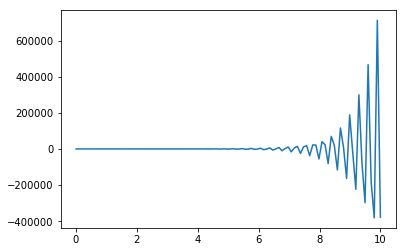

In [17]:
import numpy as np
import math

n = 2
eps = n + 0.5

def k(x):
    return 2 * eps - x**2

def H(n, x):
    h0 = 1
    h1 = 2 * x
    for i in range(0, n -3):
        h2 = 2 * x * h1 - 2 * n * h0
        h0 = h1
        h1 = h2
    return h2

def anasol(n, x):
    h = H(n, x)
    t = math.sqrt(2**n * math.factorial(x))
    return h * math.exp(-x**2 / 2) / t

def init(a, n):
    x0 = 0
    if n % 2 == 0:
        y0 = a
        y1 = y0 + h**2 * V(x0) * y0 / 2
    else:
        y0 = 0
        y1 = a
    return x0, y0, y1

def sol(x0, yo, y1, h):
    t = h**2 / 12
    k0 = k(x0)
    k1 = k(x0 + h)
    k2 = k(x0 + h*2)
    y2 = (2 *(1 - 5 * t * k1) * y1 - (1 + t * k0) * y0) / (1 + t * k2)
    return y2

def V(x):
    return x - eps

h = 1
x0, y0, y1 = init(1, n)
t = np.linspace(0, 10, 100)
y = np.array([])
#y = np.append(y, [y0])
#y = np.append(y, [y1])
for i in range(len(t)):
    y2 = sol(x0, y0, y1, h)
    y = np.append(y, [y2])
    y0 = y1
    y1 = y2

import matplotlib.pyplot as plt
plt.plot(t, y)
plt.show()


In [ ]:
def upd(V, x0, y0, h):
    F0 = V(x0) * y0
    V1 = V(x0 + h)
    V2 = V(x0 + 2 * h)
    t = h**2 / 24
    F1 = V(x0 + h) * y0
    F0prime = (F1 - F0) / h
    y0prime = 1 ###
    y1up = y0 * (1 - V2 * t) + h * y0prime * (1 - V2 * t * 2) + t * (7 * F0) - h**2 * t * V2 * F0 * 2 / 3
    y1down = 1 - V1 * t * 6 + V1 * V2 * h**4 / 18
    y1 = y1up / y1down
    y2 = (2 * y1 - y0 + t * 2 *(U2 + 10 * F1 + F0)) / (1 - V2 * t * 2)
    return y1